In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

# from src.utils import create_agent, create_environment]
from src.agents.generalized_filters import UnivariateGeneralizedFilter
from src.environments.dynamic_environments import UnivariateDynamicEnvironment

mpl.style.use("seaborn-deep")

In [3]:
# Generating functions
def fe(x, theta_x=10):
    return theta_x - x

def ge(x, theta_y=3):
    return x - theta_y

env_params = {
    "fe"          : fe,
    "ge"          : ge,
    "x_star_init" : 5,
    "dt"          : 0.01,
    "bins"        : 10,
    "seed"        : 5927,
    "var_x_star"  : 1e-4,
    "var_y_star"  : 1e-4
}

env = UnivariateDynamicEnvironment(params=env_params)

for t in range(env.T-1):
    env.step(t)

<Figure size 432x288 with 0 Axes>

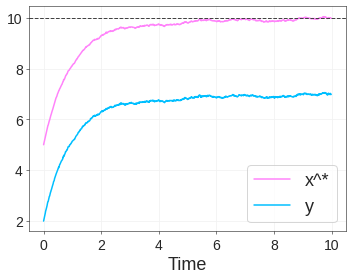

In [4]:
plt.style.use("seaborn-whitegrid")
fig = plt.figure()
fig, ax = plt.subplots(1,1, facecolor=(1,1,1), figsize=(5,4))

ax.plot(env.t, env.x_star, c="#FF83FA", label="x^*")
ax.plot(env.t, env.y, c="#00BFFF", label="y")
ax.axhline(y=10, lw=1, ls="--", c="#424242")

# Plot labels
ax.set_xlabel("Time", fontsize=18)

# Subplot legends
ax.legend(frameon=True, fontsize=18)

# Cosmetic changes and axes ranges
ax.axes.grid(which="major", axis="both", c="#f2f2f2")
plt.setp(ax.spines.values(), color="black", linewidth=0.5)
ax.tick_params(
    labelsize=14,
    axis='both',          
    which='major',      
    bottom=True,
    left=True,
    color="black",
    width=0.5,
    length=3)

fig.tight_layout()

In [7]:
# Agent's generating function for x
def gm(mu_x):
    return ge(mu_x)

# Derivative of agent's generating function for y 
def dgm_dmu(mu_x):
    return 1

# Derivative of agent's generating function for mu_x 
def dfm_dmu(mu_x):
    return -1

# Agent's generating function for mu_x
def fm(mu_x):
    return fe(mu_x)

agent_params = {
    "dt"        : 0.01,
    "bins"      : 10,
    "var_x"     : 5,
    "var_y"     : 0.02,
    "kappa"     : 0.1,
    "mu_x_init" : 15,
    "gm"        : gm,
    "fm"        : fm,
    "dgm_dmu"   : dgm_dmu,
    "dfm_dmu"   : dfm_dmu
}

agent = UnivariateGeneralizedFilter(y=env.y, params=agent_params)

In [9]:
for t in range(env.T-1):
    env.step(t)
    agent.step(env.y, t)

IndexError: arrays used as indices must be of integer (or boolean) type

In [41]:
plt.style.use("seaborn-whitegrid")
fig = plt.figure()
fig, axes = plt.subplots(1,3, facecolor=(1,1,1), figsize=(12,4))

# Left plot
axes[0].plot(env.t, env.x_star, c="#FF83FA", label="x^*")
axes[0].plot(env.t, agent.mu_x, c="#68228B", ls="--", lw=1.5, label="mu_x")
axes[0].plot(env.t, env.y, c="#00BFFF", label="y")
axes[0].plot(env.t, agent.mu_y, c="#00688B", ls="--", lw=1.5, label="mu_y")

# Middle plot
axes[1].plot(t, agent.e_y, c="#00688B", label="e_y")
axes[1].plot(t, agent.e_x, c="#68228B", label="e_x")

# Left plot
axes[2].plot(t, agent.vfe, c="#458B00", label="VFE")

# Plot labels
fig.supxlabel("Time", fontsize=18)

# Subplot legends
axes[0].legend(frameon=True, fontsize=18, ncol=2)
axes[1].legend(frameon=True, fontsize=18)
axes[2].legend(frameon=True, fontsize=18)

# Cosmetic changes and axes ranges
for ax in axes.reshape(-1):
    ax.axes.grid(which="major", axis="both", c="#f2f2f2")
    plt.setp(ax.spines.values(), color="black", linewidth=0.5)
    ax.tick_params(
        labelsize=14,
        axis='both',          
        which='major',      
        bottom=True,
        left=True,
        color="black",
        width=0.5,
        length=3)

fig.tight_layout()

SyntaxError: invalid syntax (145940358.py, line 19)